# Proyek Analisa Prediksi : [Prediksi Stroke]

---


- **Nama:** [Rizka Indah Puspita]
- **Email:** [rizkaindahpuspita@gmail.com]

## Pendahuluan

---



Pada proyek ini, saya mengambil dataset dengan tema kesehatan. Masalah yang diangkat dalam tema ini adalah penyakit stroke. Stroke merupakan kondisi medis serius yang terjadi ketika suplai darah ke otak terganggu, yang dapat menyebabkan kerusakan permanen pada fungsi tubuh dan bahkan kematian.

Pada dataset ini, model akan mengeksplorasi hubungan antara beberapa indikator kesehatan dengan kemungkinan terjadinya stroke. Indikator-indikator tersebut meliputi usia, tekanan darah, kadar glukosa dalam darah, indeks massa tubuh (BMI), riwayat penyakit jantung, riwayat merokok, serta faktor lainnya yang berpotensi meningkatkan risiko stroke.

Model yang telah dikembangkan nantinya diharapkan mampu memprediksi kemungkinan terjadinya stroke berdasarkan indikator kesehatan yang tersedia. Dengan adanya model prediksi ini, diharapkan dapat membantu dalam upaya pencegahan dan deteksi dini stroke sehingga penanganan dapat dilakukan lebih cepat dan efektif.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier


## Data Wrangling

### Memuat Dataset


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rizkaindahp/sub_mlt_predictive_analysis/refs/heads/main/healthcare-dataset-stroke-data.csv")
data.head()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


*   Data berjumlah 5110 sample
*   Terdiri dari 12 fitur/column



### Assesing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Informasi Fitur
1.   id: Penomoran unik untuk tiap data.
2.   gender: Jenis kelamin individu (Male/Female/Other).
3.   age: Usia pasien.
4.   hypertension: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi.
5.   heart_disease: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung.
6.   ever_married: Status pernikahan (Yes, No).
7.   work_type: Untuk menunjukkan jenis pekerjaan (Private, Self-employed, Govt_job, Children, Never_worked).
8.   Residence_type: Menunjukkan jenis tempat tinggal (Urban, Rural).
9.   avg_glucose_level: Kadar glukosa rata-rata dalam darah.
10.   bmi: Indeks massa tubuh.
11.   smoking_status: Menunjukkan status merokok seseorang/individu (formerly smoked, never smoked, smokes, Unknown).
12.   stroke: 1 jika pasien mengalami stroke atau 0 jika tidak.

*Catatan: "Unknown" dalam smoking_status berarti informasi tersebut tidak tersedia untuk pasien ini

In [ ]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Penjelasan:

*   Dataset memiliki data tipe angka/numerik (id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke) dan data tipe object (gender, ever_merried, work_type, Residence_type, smoking_status).
*   Rata-rata umur berada di usia 43 tahun
*   count adalah jumlah sampel pada data.
*   mean adalah nilai rata-rata.
*   std adalah standar deviasi.
*   min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.



### Cleaning Data

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Penjelasan :
*   Terdapat missing value pada fitur **bmi**

In [ ]:
# Mengecek jika ada duplikasi pada data
print('Jumlah duplikasi : ', data.duplicated().sum())

Jumlah duplikasi :  0


Penjelasan :
*   Tidak ada data yg duplikat

In [ ]:
data.drop(['id'], axis=1, inplace=True)

Penjelasan :
*   Menghapus kolom/fitur 'id' karena tidak berpengaruh terhadap data

In [ ]:
data.dropna(subset=['bmi'], inplace=True)

Penjelasan :
*   Menghapus baris pada fitur "bmi" yang memiliki data NA/Null.

In [ ]:
data.shape

(4909, 11)

Penjelasan :
*   Total data setelah di drop missing value di bagian 'bmi' menjadi 4909 sample dan fitur/kolom menjadi 11.

## EDA

In [ ]:
df_eda = [col for col in data.columns if col != 'stroke']
df_eda

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

*   Informasi list fitur pada dataset kecuali **stroke**




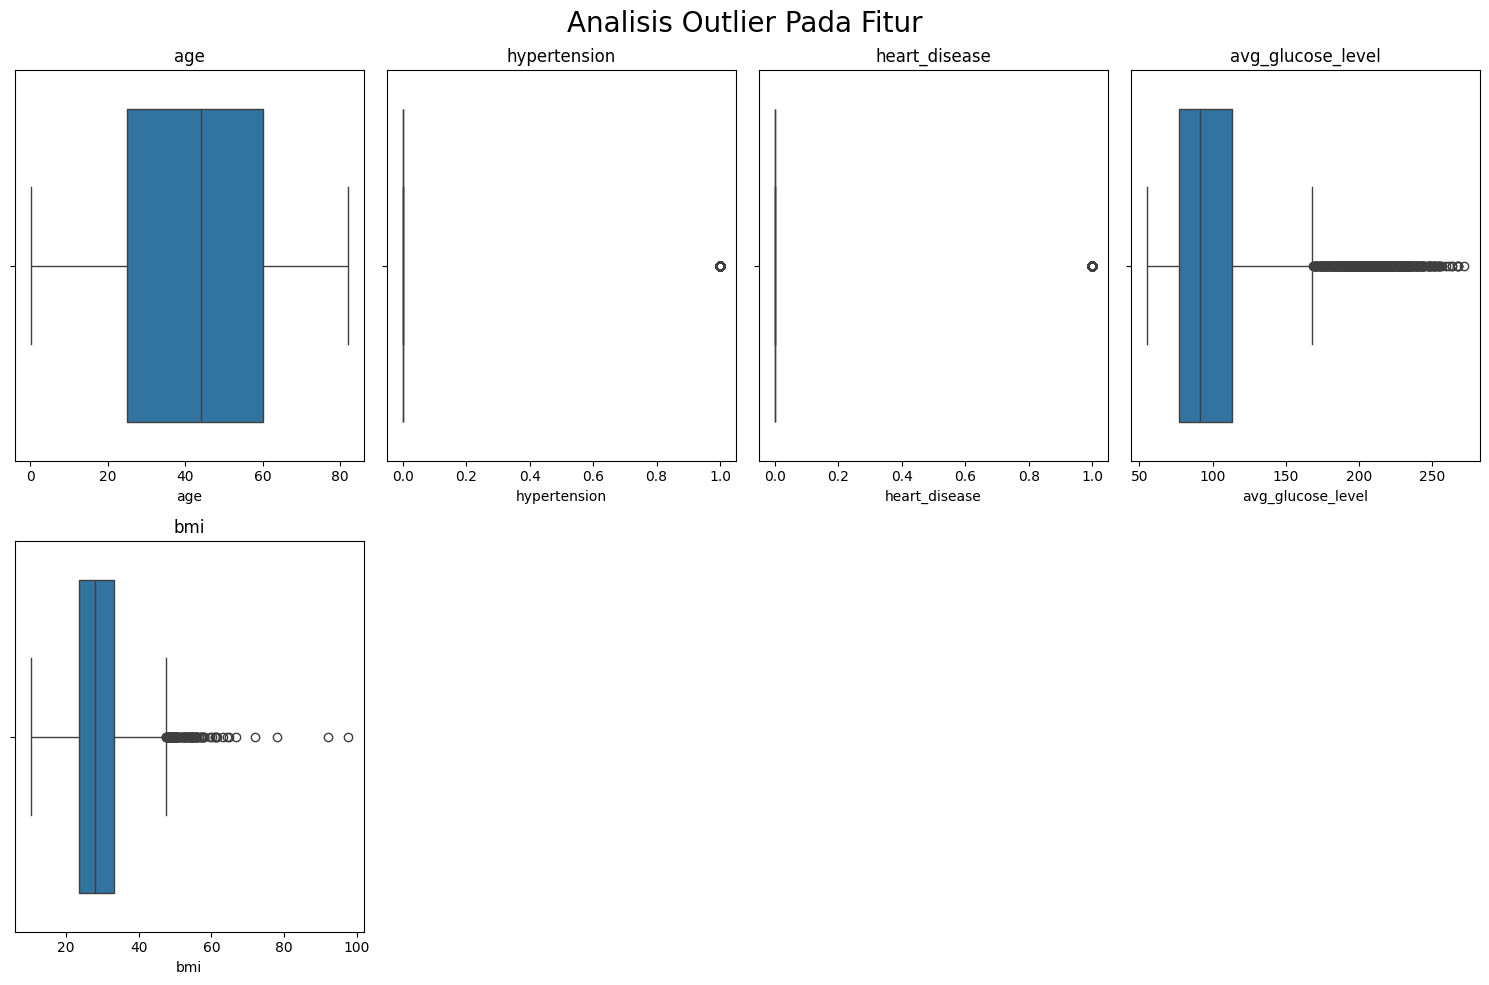

In [ ]:
# Memilih hanya kolom numerik
df_outlier = data[df_eda].select_dtypes(exclude=['object'])

# Menentukan jumlah kolom per baris
num_cols = 4
num_rows = (len(df_outlier.columns) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang dibutuhkan

# Membuat figure dengan subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Flatten axes agar bisa diiterasi
axes = axes.flatten()

# Plot setiap kolom numerik ke dalam subplot
plt.suptitle('Analisis Outlier Pada Fitur', fontsize=20)
for i, column in enumerate(df_outlier.columns):
    sns.boxplot(data=df_outlier, x=column, ax=axes[i])
    axes[i].set_title(column)

# Menghapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


*   Boxplot digunakan untuk memvisualisasikan outlier yang ada di dalam fitur.
*   Outlier kemungkinan ditemukan pada fitur avg_glucose_level dan bmi.



In [ ]:
# Menangani outlier_df dengan cara menghapus data yang bernilai 0
def drop_anomaly(data):
    outlier_df = ['avg_glucose_level', 'bmi']
    q1 = data[outlier_df].quantile(0.25)
    q3 = data[outlier_df].quantile(0.75)
    iqr = q3 - q1

    # Hanya perlu menghilangkan bagian bawah yang bernilai 0
    min = q1 - (iqr * 1.5)

    lower_array = np.where(data[outlier_df] <= min)[0]

    data.drop(index=lower_array, inplace=True)

    return data

data = drop_anomaly(data)
data.shape

(4909, 11)


*   Setelah dilakukan pengecekan outlier terhadap 2 fitur tersebut
(avg_glucose_level dan bmi) total data masih berada di 4909. Berarti fitur tersebut tidak berpengaruh terhadap outlier darena tidak ada data yang dibawah 0


### Univariate Analysis



In [ ]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

- Menyimpan data yang Numeric dan Kategorikal ke dalam variabel masing-masing

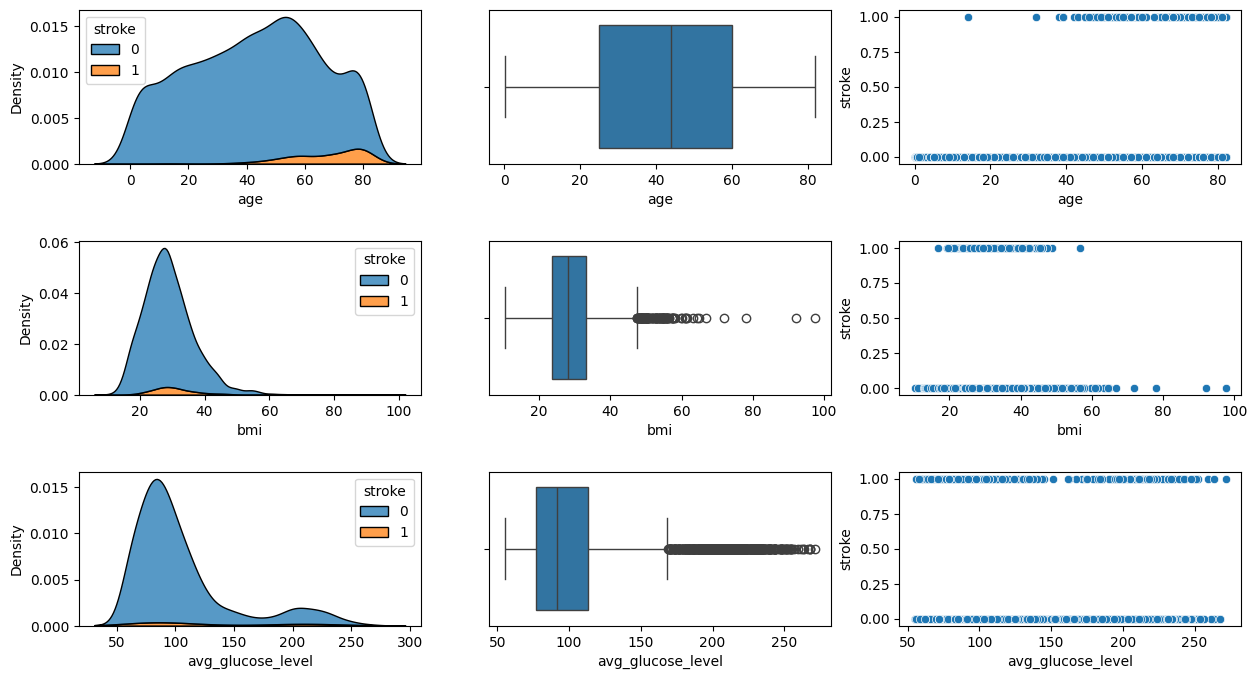

In [ ]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])
    i+=1
plt.show()

Penjelasan:
- Chart/Plot yang di bagian kiri merupakan visualisasi Distribusi Data (KDE Plot)
- Chart/Plot yang di tengah merupakan visualisasi Boxplot (Deteksi Outlier)
- Chart/Plot yang di bagian kanan merupakan visualisasi Scatter Plot (Hubungan Fitur dengan Stroke)
Faktor usia (age) dan kadar glukosa darah (avg_glucose_level) memiliki hubungan kuat dengan stroke.
- Individu dengan kadar glukosa tinggi (avg_glucose_level) memiliki kemungkinan lebih besar terkena stroke.
- Obesitas (bmi tinggi) mungkin berpengaruh terhadap stroke, tetapi hubungannya tidak terlalu jelas dalam visualisasi ini.


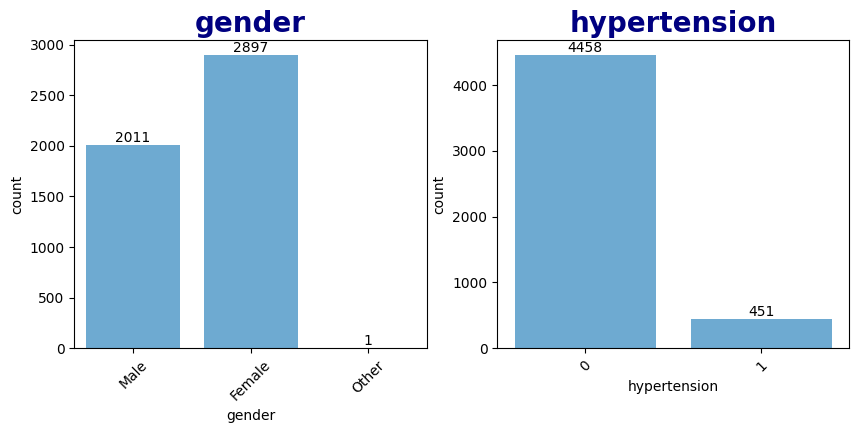

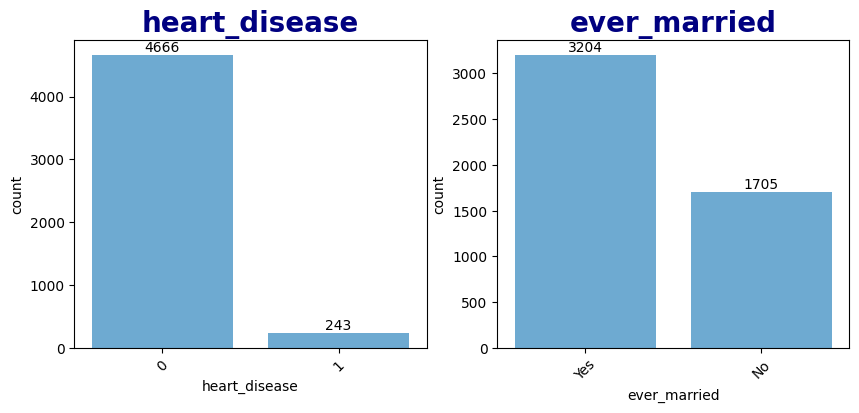

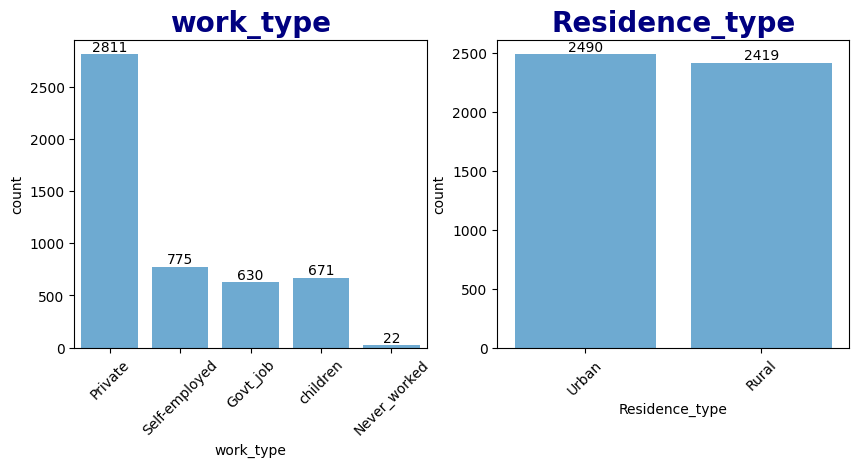

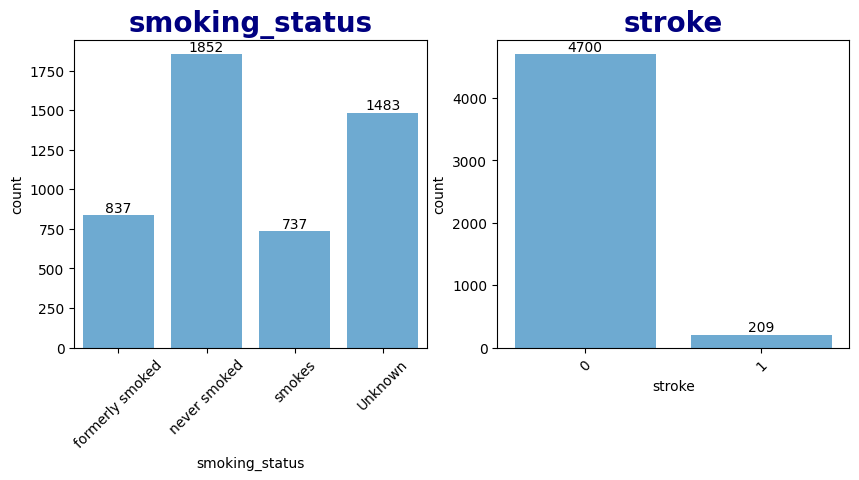

In [ ]:
i = 0
while i < 8:
    # Left AX
    fig = plt.figure(figsize=(10, 4))

    # Subplot pertama
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data, color='#5dade2')  # Warna biru muda
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=45)
    i += 1

    # Subplot kedua
    if i < len(categorical_columns):  # Pastikan tidak melewati batas indeks
        plt.subplot(1, 2, 2)
        plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
        ax = sns.countplot(x=categorical_columns[i], data=data, color='#5dade2')  # Warna biru muda
        ax.bar_label(ax.containers[0])
        ax.tick_params(axis='x', rotation=45)
        i += 1

    plt.show()


- Menampilkan atau memvisualisasikan total dari masing-masing fitur kategorikal melalui bar chart sehingga data lebih menarik untuk dilihat atau dibaca

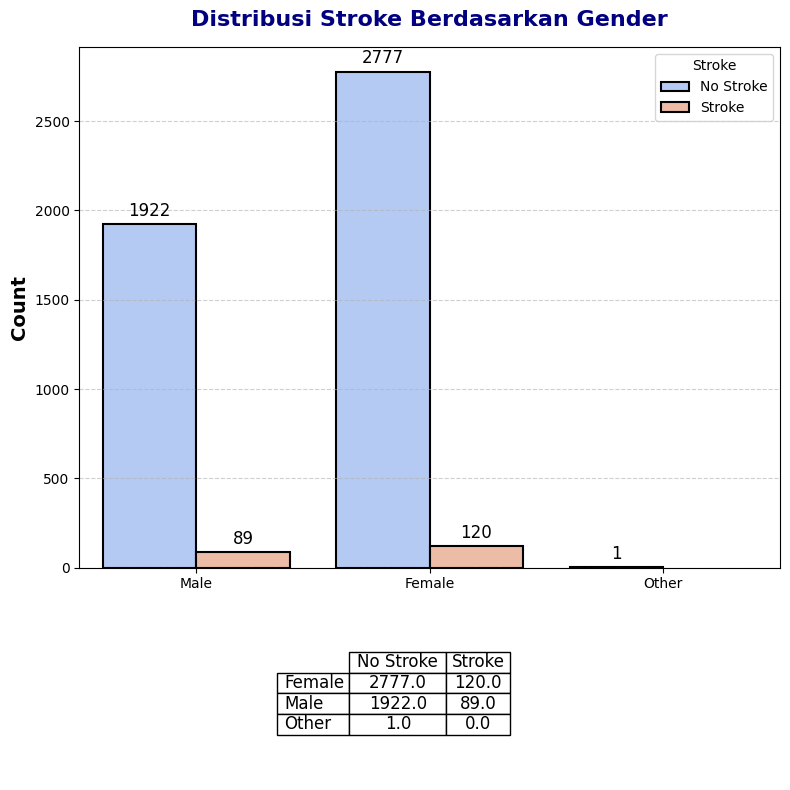

In [ ]:
# Hitung jumlah stroke berdasarkan gender
stroke_counts = data.groupby(["gender", "stroke"]).size().unstack().fillna(0)
stroke_counts.columns = ["No Stroke", "Stroke"]

# Buat figure dan axes
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

# **Bagian 1: Bar Plot**
sns.countplot(x="gender", hue="stroke", data=data,
              palette=sns.color_palette("coolwarm", 2),
              edgecolor="black", linewidth=1.5, ax=ax[0])

# Tambahkan label di atas bar
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=12, padding=3, color="black")

ax[0].set_title("Distribusi Stroke Berdasarkan Gender", size=16, weight="bold", color="navy", pad=15)
ax[0].set_xlabel("")
ax[0].set_ylabel("Count", fontsize=14, weight="bold")
ax[0].legend(title="Stroke", labels=["No Stroke", "Stroke"])
ax[0].grid(axis="y", linestyle="--", alpha=0.6)

# **Bagian 2: Tabel Frekuensi**
ax[1].axis("tight")
ax[1].axis("off")
table = ax[1].table(cellText=stroke_counts.values,
                     colLabels=stroke_counts.columns,
                     rowLabels=stroke_counts.index,
                     cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1])

plt.tight_layout()
plt.show()


Penjelasan:
- Dari data diatas pasien perempuan (Female) yang mengalami stroke lebih banyak dibandingkan dengan laki-laki (Male). Begitu juga untuk pasien perempuan yg tidak mengalami stroke lebih tinggi dibandingkan laki-laki.
- Dan ada 1 data pasien yang tidak menyebutkan gender nya

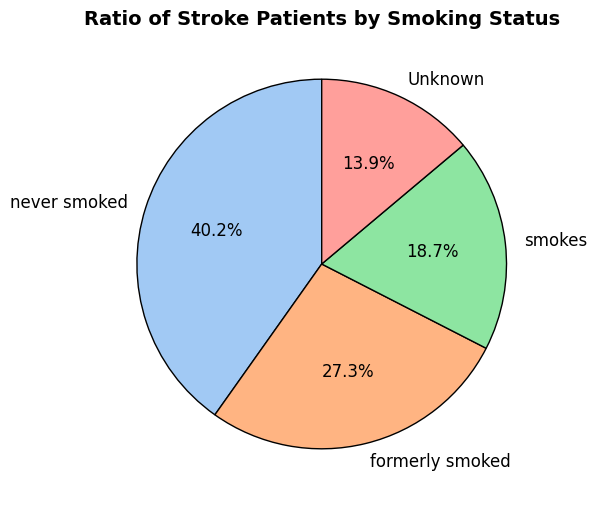

In [ ]:
# Filter only stroke patients
stroke_data = data[data["stroke"] == 1]

# Count the number of stroke patients in each smoking category
stroke_counts = stroke_data["smoking_status"].value_counts()

# Define colors
colors = sns.color_palette("pastel", len(stroke_counts))

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12})

# Title
plt.title("Ratio of Stroke Patients by Smoking Status", fontsize=14, weight="bold")

# Show plot
plt.show()

Penjelasan:

*  Sebagian besar pasien stroke tidak pernah merokok (never smoked) dengan rasio 40,2%
*  Beberapa pasien stroke pernah merokok secara intens (formerly smoked) dengan rasio 27,3%
*  Beberapa pasien stroke merokok (smokes) sebelumnya dengan rasio 18,7%
*  Sisanya untuk beberapa pasien, status merokok tidak diketahui (Unknown)

### Multivariate Analysis



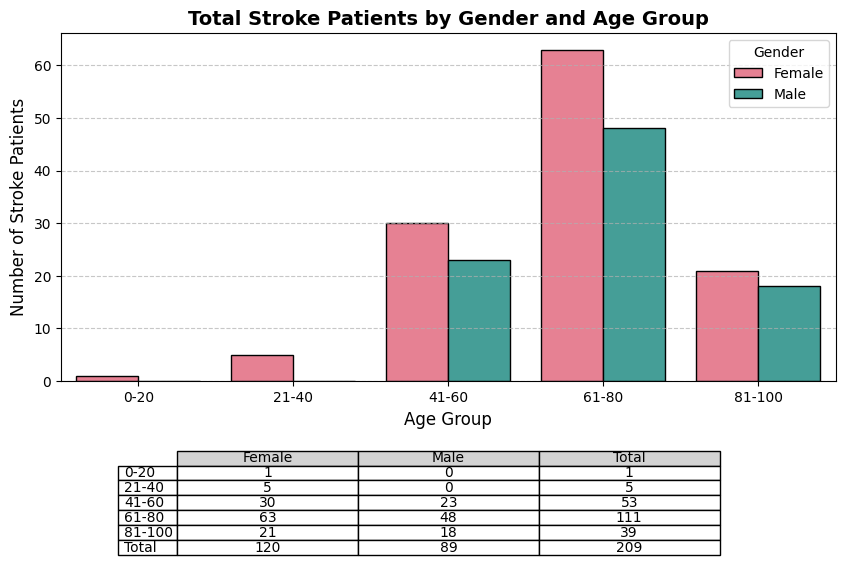

In [ ]:
# Filter hanya pasien yang mengalami stroke
stroke_data = data[data["stroke"] == 1].copy()

# Mengelompokkan usia ke dalam rentang tertentu
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]
stroke_data.loc[:, "age_group"] = pd.cut(stroke_data["age"], bins=age_bins, labels=age_labels, right=False)

# Menghitung jumlah pasien stroke berdasarkan gender dan kelompok usia
age_gender_counts = stroke_data.groupby(["age_group", "gender"], observed=False).size().reset_index(name="count")

# Menentukan warna otomatis berdasarkan jumlah kategori gender
unique_genders = age_gender_counts["gender"].nunique()
palette = sns.color_palette("husl", unique_genders)  # Gunakan palet warna otomatis

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=age_gender_counts, x="age_group", y="count", hue="gender", palette=palette, edgecolor="black", ax=ax)

# Menambahkan judul dan label
ax.set_title("Total Stroke Patients by Gender and Age Group", fontsize=14, weight="bold")
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Number of Stroke Patients", fontsize=12)
ax.legend(title="Gender")

# Menampilkan grid pada sumbu Y
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Membuat tabel kecil di bawah chart
table_data = age_gender_counts.pivot(index="age_group", columns="gender", values="count").fillna(0)
table_data["Total"] = table_data.sum(axis=1)  # Menambahkan kolom total
table_data.loc["Total"] = table_data.sum()  # Menambahkan baris total

# Menambahkan tabel ke plot
table_ax = plt.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index,
                     cellLoc="center", loc="center",colColours=["lightgray"]*len(table_data.columns), bbox=[0.15, -0.5, 0.7, 0.3])

# Menyesuaikan layout agar tabel tidak bertabrakan dengan chart
plt.subplots_adjust(bottom=0.3)

# Menampilkan plot
plt.show()

Penjelasan:
- Dari tampilan chart diatas diketahui rentang usia pasien yang paling banyak/tertinggi mengalami stroke di rentang usia `61-80` tahun sedangkan yang paling sedikit yaitu direntang usia `0-20` tahun.

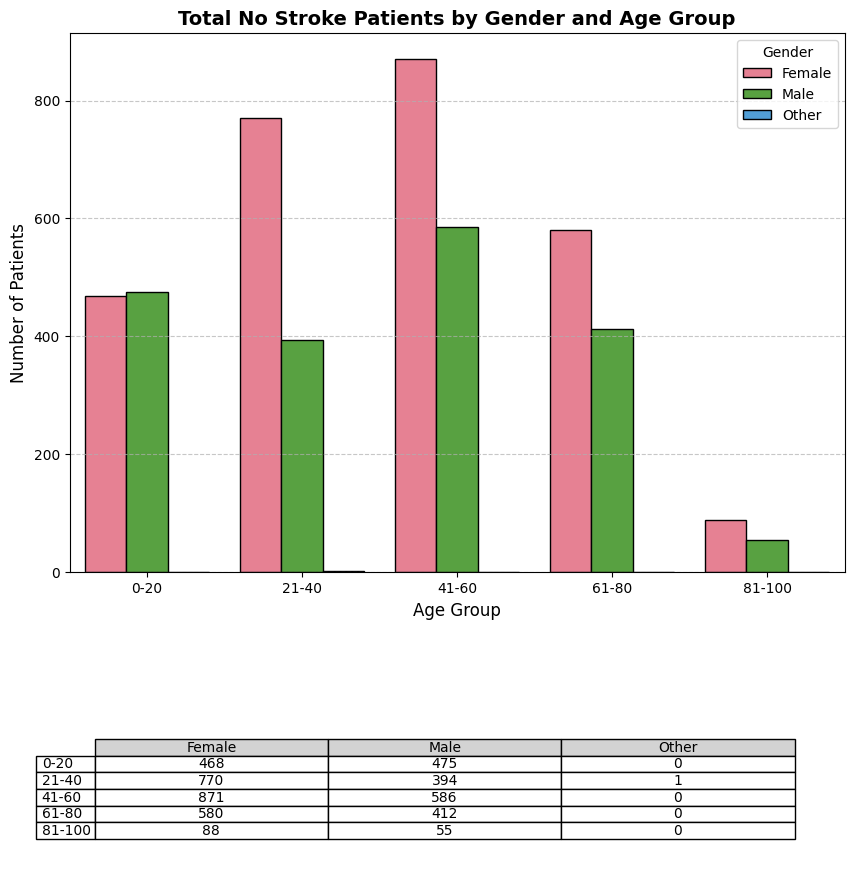

In [ ]:
# Filter hanya pasien yang tidak mengalami stroke
no_stroke_data = data[data["stroke"] == 0].copy()

# Mengelompokkan usia ke dalam rentang tertentu
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]
no_stroke_data.loc[:, "age_group"] = pd.cut(no_stroke_data["age"], bins=age_bins, labels=age_labels, right=False)

# Menghitung jumlah pasien yang tidak mengalami stroke berdasarkan gender dan kelompok usia
age_gender_counts = no_stroke_data.groupby(["age_group", "gender"], observed=False).size().reset_index(name="count")

# Membuat tabel jumlah pasien
table_data = age_gender_counts.pivot(index="age_group", columns="gender", values="count").fillna(0)

# Menentukan warna otomatis berdasarkan jumlah kategori gender
unique_genders = age_gender_counts["gender"].nunique()
palette = sns.color_palette("husl", unique_genders)  # Warna otomatis berdasarkan gender

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bar chart
sns.barplot(data=age_gender_counts, x="age_group", y="count", hue="gender", palette=palette, edgecolor="black", ax=ax)

# Menambahkan judul dan label
ax.set_title("Total No Stroke Patients by Gender and Age Group", fontsize=14, weight="bold")
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)

# Menampilkan legend
ax.legend(title="Gender")

# Menampilkan grid pada sumbu Y
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Menambahkan tabel kecil di bawah chart
table_ax = fig.add_axes([0.15, -0.3, 0.7, 0.2])  # [left, bottom, width, height]
table_ax.axis("off")  # Sembunyikan axis
table_ax.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index,
               cellLoc="center", loc="center", colColours=["lightgray"]*len(table_data.columns))

# Menampilkan plot
plt.show()


Penjelasan:
- Dari tampilan chart diatas diketahui rentang usia pasien yang tertinggi tidak mengalami stroke (No Stroke) di rentang usia `41-60` tahun sedangkan yang paling sedikit yaitu direntang usia `81-100` tahun.

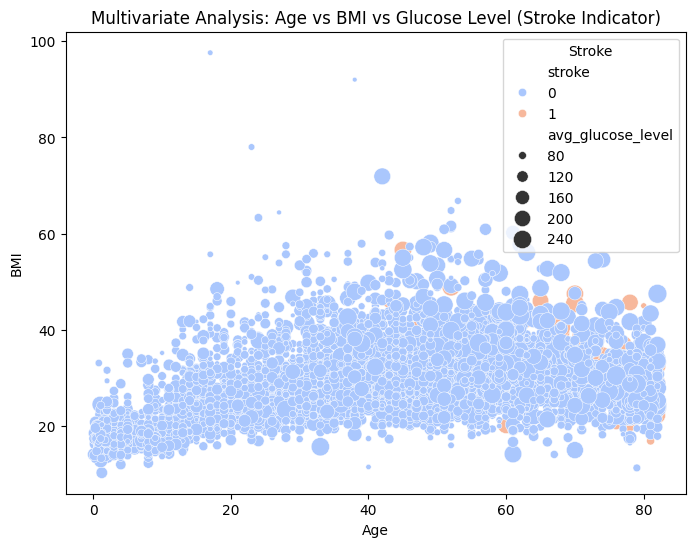

In [ ]:
# Scatter plot dengan warna berdasarkan stroke
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="age", y="bmi", hue="stroke", size="avg_glucose_level", palette="coolwarm", sizes=(10,200))

plt.title("Multivariate Analysis: Age vs BMI vs Glucose Level (Stroke Indicator)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Stroke", loc="upper right")
plt.show()


- Menampilkan scatter plot untuk fitur stroke vs avg_gluscode_level
- Terlihat bahwa pasien No Stroke (titik biru) labih banyak diabndingkan pasien stroke

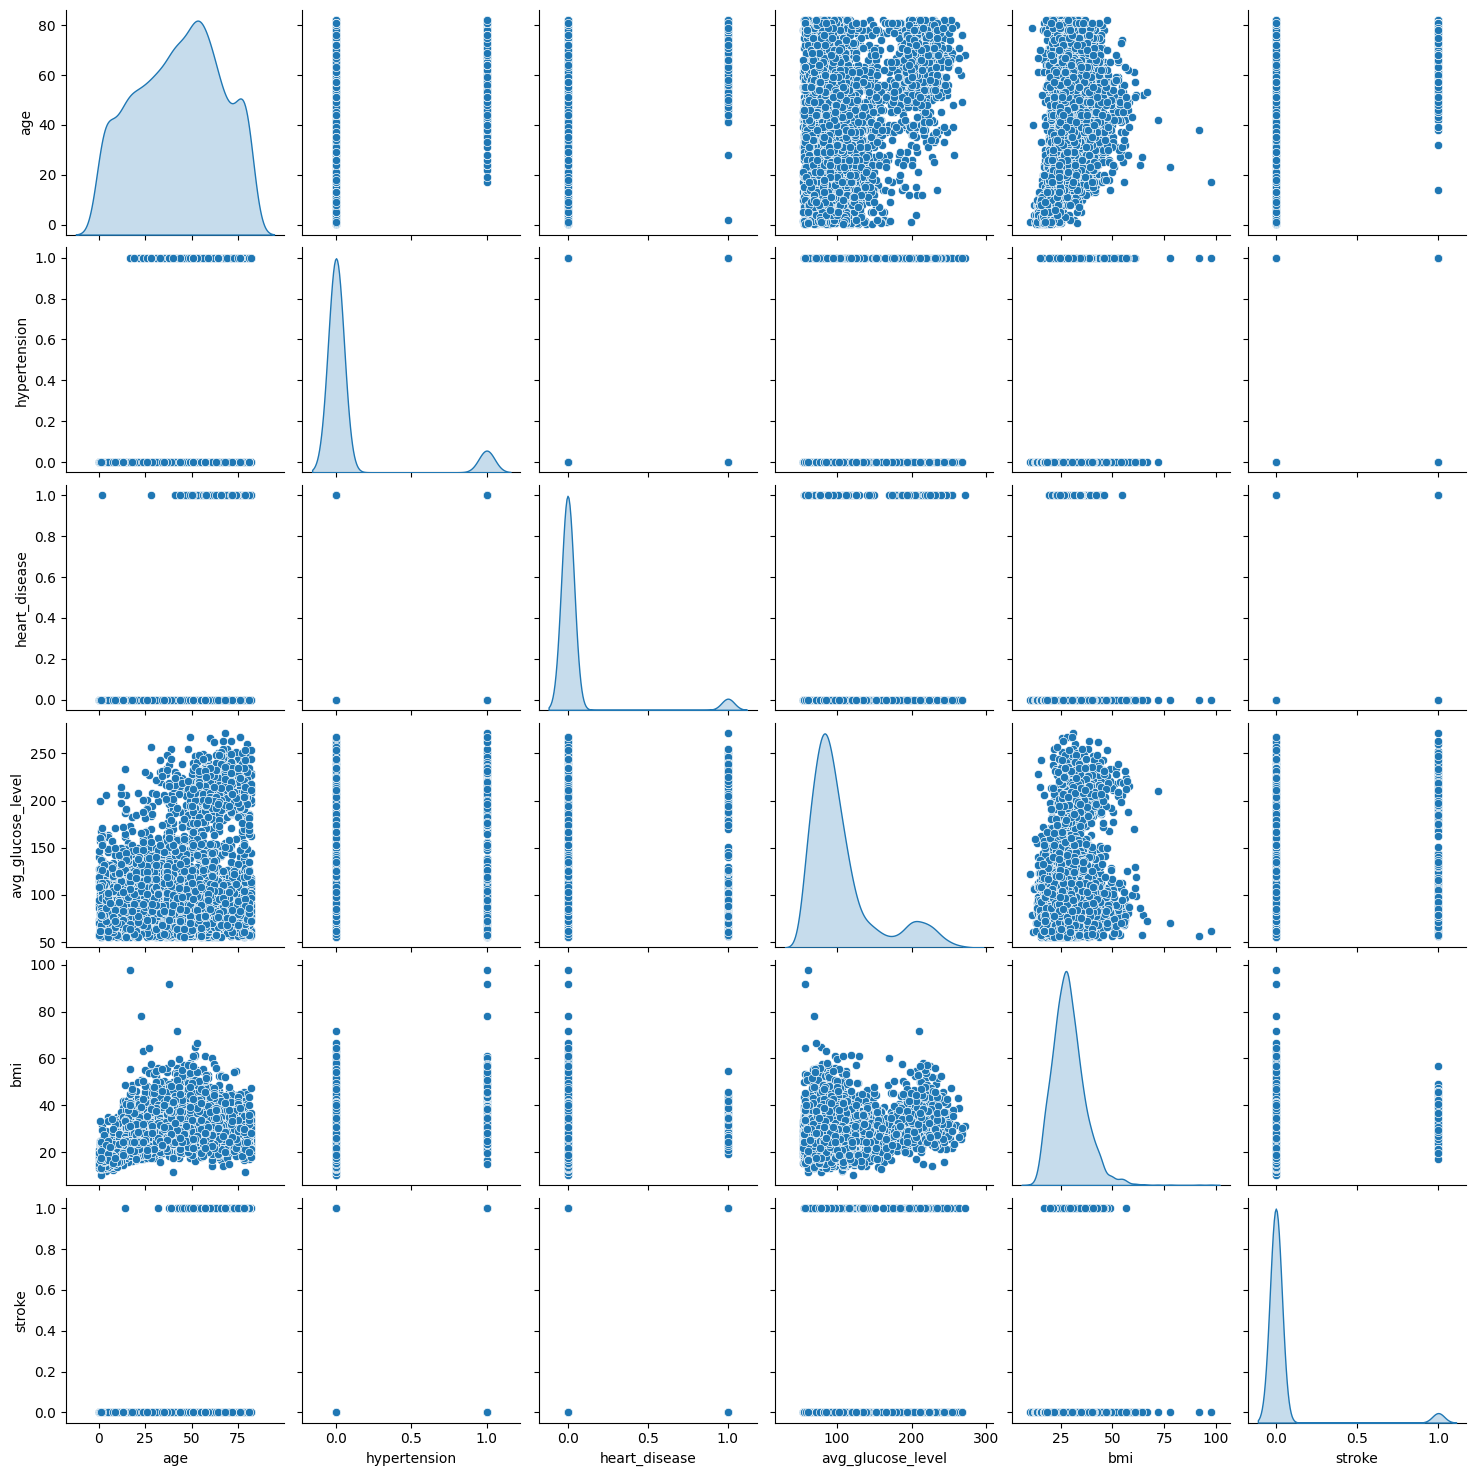

In [ ]:
# Membuat pairplot untuk memetakan hubungan antar fitur
sns.pairplot(data, diag_kind = 'kde')

Penjelasan :
- Visualisasi menggunankan pairplot Correlation

- Kode di atas memberikan informasi mengenai korelasi antara fitur numerik, dimana dari Correlation Matrix dapat dilihat bahwa fitur yang paling berpengaruh terhadap stroke dalam dataset ini adalah age. Sedangkan BMI hampir tidak berkorelasi dengan stroke.

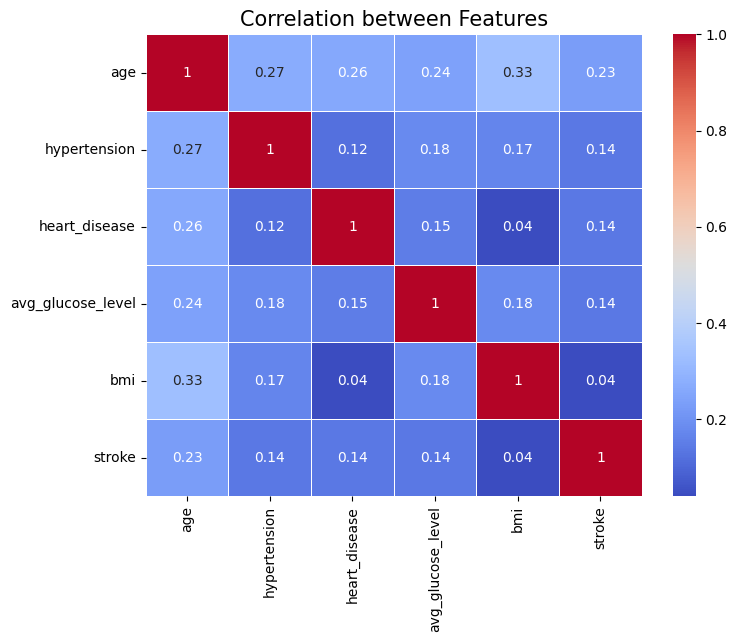

In [ ]:
# Memetakan korelasi antar fitur menggunakan heatmap
# Filter kolom numerik
numeric_data = data.select_dtypes(include=['number'])

corelation = numeric_data.corr().round(2)

plt.figure(figsize=(8,6))
sns.heatmap(corelation, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation between Features', fontsize=15)
plt.show()

Penjelasan :
- Visualisasi menggunakan Heatmap Correlation

- Kode di atas memberikan informasi mengenai korelasi antara fitur numerik, dimana dari Correlation Matrix dapat dilihat bahwa fitur yang paling berpengaruh terhadap stroke dalam dataset ini adalah age. Sedangkan BMI hampir tidak berkorelasi dengan stroke.


In [ ]:
data.shape

(4909, 11)

## Data Preprocessing

### Label Encoding

In [ ]:
#  Using Lable encoding
le = LabelEncoder()
df_prep = data.apply(le.fit_transform)
df_prep.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1




*   Mengubah nilai kategorikal (teks) menjadi angka agar bisa digunakan dalam algoritma machine learning
*   Data kategorikal yg dirubah yaitu gender, ever_merried, work_type, Residence_type, smoking_status



In [ ]:
df_prep.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- Menampilkan columns yang ada pada var df_prep

### Melakukan Pembagian Dataset

In [ ]:
# Misalkan kita punya dataset df_prep dengan fitur X dan target y
X = df_prep.drop(columns=['stroke','Residence_type','work_type','ever_married','gender'])  # Fitur
y = df_prep['stroke']  # Target

- Membagi data fitur (X) dan target (y)

In [ ]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state=42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 4909
Total jumlah sample pada train dataset: 3927
Total jumlah sample pada test dataset: 982


- Melakukan pembagian data X dan y dengan train_test_split
- Menggunakan perbandingan 80:20 untuk data train dan test
- Menggunakan random_state 42

### Overcoming Outliers in train data using the LOF (Local Outlier Factor) method


In [ ]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
X_train.shape

(3896, 6)

Penjelasan :

*  Data pencilan (outliers) merupakan nilai yang tidak normal pada
dataset. Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya sehingga dapat menyebabkan pada pembuatan model menjadi kurang optimal. Oleh karena itu, untuk menangani outliers pada proyek ini menerapkan metode Local Outlier Factor untuk mengidentifikasi outliers dan kemudian menghapusnya dari data train, sehingga jumlah sampelnya menjadi 3896 sampel.

### Standarisasi data pada fitur numerik


In [ ]:
# melakukan standarisasi dengan fungsi StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.13359424, -0.3117799 , -0.24357992, -1.33444938,  0.27756348,
         0.58641262],
       [ 0.68634038, -0.3117799 , -0.24357992, -0.58202912,  0.48361486,
        -1.28022335],
       [ 0.60003148, -0.3117799 , -0.24357992,  1.68640625,  0.97298689,
         0.58641262],
       ...,
       [ 0.42741366, -0.3117799 , -0.24357992, -0.1015231 , -0.89435374,
        -0.34690536],
       [-1.38507339, -0.3117799 , -0.24357992,  0.02884675, -1.06177049,
        -1.28022335],
       [ 0.8589582 , -0.3117799 , -0.24357992, -1.61381335, -0.03151359,
        -0.34690536]])

In [ ]:
X_test

array([[ 1.59258391, -0.3117799 ,  4.10542878,  1.05783734,  0.49649308,
        -1.28022335],
       [-0.04728533, -0.3117799 , -0.24357992, -0.44420956,  0.30331991,
         0.58641262],
       [ 0.98842156,  3.20739089, -0.24357992, -0.93589013,  0.39346739,
         0.58641262],
       ...,
       [ 0.55687702, -0.3117799 , -0.24357992,  1.00382697,  1.08889079,
        -0.34690536],
       [ 1.24734828, -0.3117799 , -0.24357992, -0.97313866,  0.83132657,
        -0.34690536],
       [ 0.42741366, -0.3117799 , -0.24357992, -1.04856693,  3.21379565,
        -1.28022335]])

In [ ]:
X_test.shape

(982, 6)

Penjelasan:
* Setelah dilakukan standarisasi data, dapat dilihat bahwa semua nilai dari fitur numerik pada data train dan data test berada dalam skala data yang sama.

## Model

In [ ]:
# Part 1: Model Training
# Train each classifier separately
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
xgb = XGBClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Penjelasan:
* Data ini diuji dengan menggunakan model classifier.
* Menggunakan 6 buah model training sehingga nantinya bisa di bandingkan untuk mencari akurasi model yang tertinggi

### KNN


==== KNN Classifier ====
Confusion Matrix:
[[927   2]
 [ 52   1]]
Accuracy: 0.9450
Precision: 0.9138
Recall: 0.9450
F1-Score: 0.9212

----------------------------------------



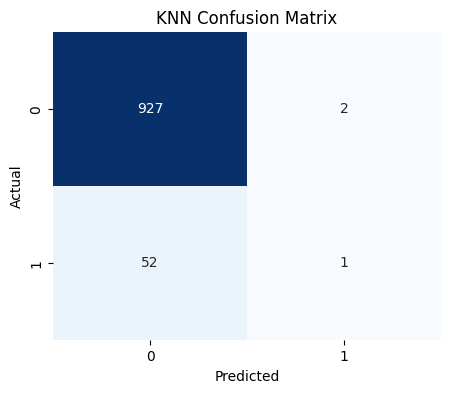

In [ ]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_knn, average='weighted')       # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_knn, average='weighted')             # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma K-Nearest Neighbor memperoleh nilai akurasi yaitu sebesar 0.9450

### DecisionTree


==== Decision Tree Classifier ====
Confusion Matrix:
[[889  40]
 [ 46   7]]
Accuracy: 0.9124
Precision: 0.9075
Recall: 0.9124
F1-Score: 0.9099

----------------------------------------



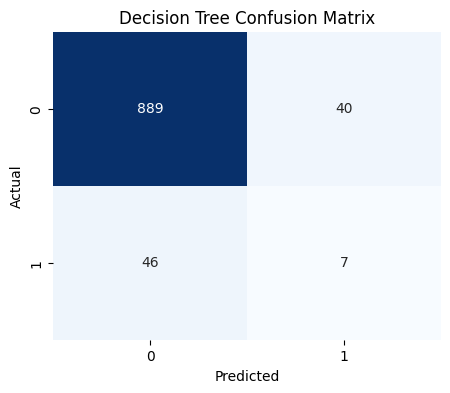

In [ ]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print the confusion matrix
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_dt, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_dt, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma Desicion Tree memperoleh nilai akurasi yaitu sebesar 0.9124

### Random Forest


==== Random Forest Classifier ====
Confusion Matrix:
[[929   0]
 [ 53   0]]
Accuracy: 0.9460
Precision: 0.8950
Recall: 0.9460
F1-Score: 0.9198

----------------------------------------



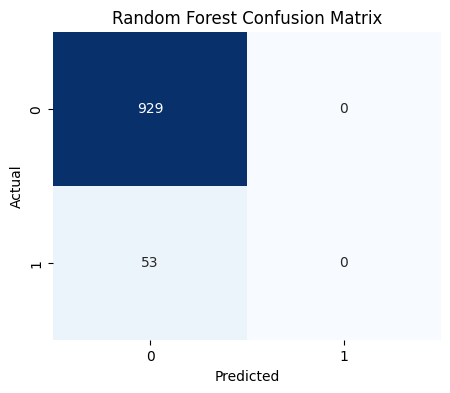

In [ ]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_rf, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_rf, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma Random Forest memperoleh nilai akurasi yaitu sebesar 0.9460

### SVM


==== SVM Classifier ====
Confusion Matrix:
[[929   0]
 [ 53   0]]
Accuracy: 0.9460
Precision: 0.8950
Recall: 0.9460
F1-Score: 0.9198

----------------------------------------



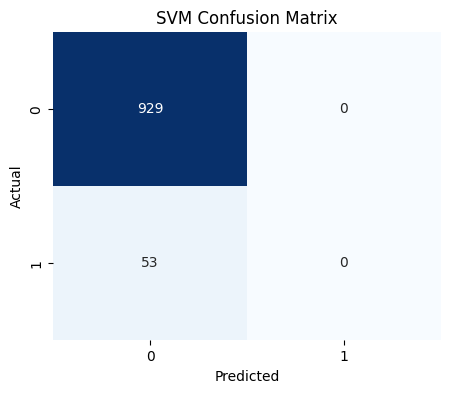

In [ ]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print the confusion matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_svm, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_svm, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma Support Vector Machine (SVM) memperoleh nilai akurasi yaitu sebesar 0.9460

### Naive Bayes (GaussionNB)


==== Naive Bayes Classifier ====
Confusion Matrix:
[[853  76]
 [ 30  23]]
Accuracy: 0.8921
Precision: 0.9264
Recall: 0.8921
F1-Score: 0.9070

----------------------------------------



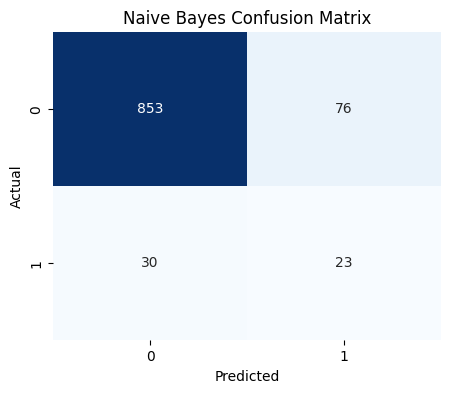

In [ ]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Print the confusion matrix
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_nb, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_nb, average='weighted')            # Use 'weighted' for multi-class


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma Naive Bayes  memperoleh nilai akurasi yaitu sebesar 0.8921

### Boost (XGBoost)


==== XGBoost Classifier ====
Confusion Matrix:
[[921   8]
 [ 50   3]]
Accuracy: 0.9409
Precision: 0.9120
Recall: 0.9409
F1-Score: 0.9222

----------------------------------------



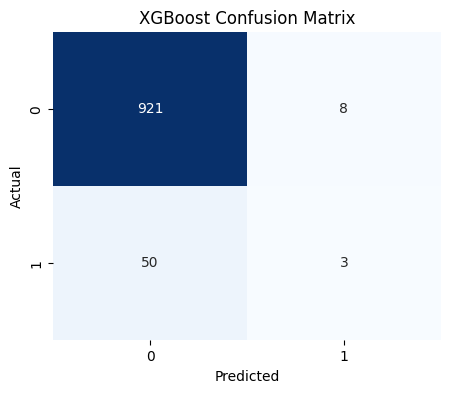

In [ ]:
# XGBoost
y_pred_xgb =xgb .predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print("==== XGBoost Classifier ====")
print("Confusion Matrix:")
print(cm_xgb)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_xgb, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_xgb, average='weighted')            # Use 'weighted' for multi-class


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Penjelasan :
* Dari code di atas dapat dilihat bahwa model dengan algoritma XGBoost  memperoleh nilai akurasi yaitu sebesar 0.9409

## Evaluasi dan Visualisasi



In [ ]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    'XGBoost (XGB)': evaluate_model(xgb, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy %', 'Precision %', 'Recall %', 'F1-Score %'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),94.50,91.38,94.50,92.12
1,Decision Tree (DT),91.24,90.75,91.24,90.99
2,Random Forest (RF),94.60,89.50,94.60,91.98
3,Support Vector Machine (SVM),94.60,89.50,94.60,91.98
4,Naive Bayes (NB),89.21,92.64,89.21,90.70
5,XGBoost (XGB),94.09,91.20,94.09,92.22


Penjelasan:

Hasil evaluasi diatas menunjukkan bahwa ada enam algoritma yang memiliki tingkat performa teratas yaitu Random Forest, Support Vector Machine, dan KNN. Ketiganya sama-sama menghasilkan performa terbaik yang sebagai acuan adalah nilai accuracy, precision, dan recall, dari enam algoritma yang dijadikan model. Disusul oleh algoritma XGBoost dan Desicion Tree yang memiliki nilai performa yang sangat baik. Terakhir, algoritma Naive Bayes (Gaussion NB) memperoleh nilai performa yang kurang baik.

**Kesimpulan**
* Random Forest (RF) dan Support Vector Machine (SVM) memiliki akurasi tertinggi (94.60%).
* Disusul oleh K-Nearest Neighbors (KNN) dengan 94.50% dan XGBoost (94.09%).
* Naïve Bayes (NB) memiliki akurasi terendah (89.21%) di antara semua model.

Rekomendasi: RF dan SVM adalah pilihan terbaik jika hanya mempertimbangkan akurasi.